The Analysis of TripAdvisor Restaurant Data between London and Paris

# Import package and environment settings

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import calendar
from datetime import datetime,timedelta

import os 
import scipy.stats as sps
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

# os.chdir("E:/200_CASA/07_QM/QM_CW2")
# os.getcwd()

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('seaborn-whitegrid') # specifies that graphs should use ggplot styling
plt1 = "coolwarm"

# Load Raw Dataset

This data can be accessed in this [kaggle](https://www.kaggle.com/damienbeneschi/krakow-ta-restaurans-data-raw)
This dataset has been obtained by scraping TripAdvisor (the famous tourism website) for information about restaurants for a given city. The scraper goes through the restaurants listing pages and fulfills a raw dataset. The raw datasets for the main cities in Europe have been then curated for futher analysis purposes, and aggregated to obtain this dataset. 

Dataset Limitation: 
The restaurants list contains the restaurants that are registrered in the TA database only. All the restaurants of a city may not be resgistered in this database.

Included Cities:
The dataset contain restaurants information for 31 cities in Europe: Amsterdam (NL), Athens (GR) , Barcelona (ES) , Berlin (DE), Bratislava (SK), Bruxelles (BE), Budapest (HU), Copenhagen (DK), Dublin (IE), Edinburgh (UK), Geneva (CH), Helsinki (FI), Hamburg (DE), Krakow (PL), Lisbon (PT), Ljubljana (SI), London (UK), Luxembourg (LU), Madrid (ES), Lyon (FR), Milan (IT), Munich (DE), Oporto (PT), Oslo (NO), Paris (FR), Prague (CZ), Rome (IT), Stockholm (SE), Vienna (AT), Warsaw (PL), Zurich (CH).

In [24]:
df = pd.read_csv("TA_restaurants_curated.csv").convert_dtypes()

In [ ]:
# To see all variables in dataframe
list(df.columns)

# Overview and Data Summary

In [ ]:
# see the first five rows of dataframe
df.head()

## Data Summary for Numeric Data

In [ ]:
df.describe()

We can see the std differences between 'Rating' and 'Number of Reviews' 

## Data Summary for Types

In [ ]:
display(df.dtypes)

# Data Cleaning

It is necessary to be selective to choose variables (columns). In the next step, we drop the unnecessary values.

In [27]:
dfc = df.drop(columns = ['Unnamed: 0','URL_TA','ID_TA','Reviews']) 
# overview of newly processed dataframe
dfc

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1,5.0000,$$ - $$$,136
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2,4.5000,$$$$,812
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3,4.5000,$$$$,567
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4,5.0000,$$$$,564
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5,4.5000,$$$$,316
...,...,...,...,...,...,...,...
125522,Konrad Kaffee- & Cocktailbar,Zurich,<NA>,<NA>,nan,<NA>,<NA>
125523,Blueberry American Bakery,Zurich,['Cafe'],<NA>,nan,<NA>,<NA>
125524,Restaurant Bahnhof,Zurich,<NA>,<NA>,nan,<NA>,<NA>
125525,Yoyo Pizza,Zurich,['Fast Food'],<NA>,nan,<NA>,<NA>


As you can see values above. There are more thatn 120,000 rows in this dataset.

## Data Types

In [ ]:
display(dfc.dtypes)

As the results presented above, we can see there are 3 Nominal and 3 Ratio data. But City, cuisine style, and Price Range here are category variables.
In the next section, we are willing to convert data into category or list.

In [28]:
categoryVariableList = ["City","Cuisine Style","Price Range"]
for var in categoryVariableList:
    dfc[var] = dfc[var].astype("category")
display(dfc.dtypes)

Name                   string
City                 category
Cuisine Style        category
Ranking                 Int64
Rating                float64
Price Range          category
Number of Reviews       Int64
dtype: object

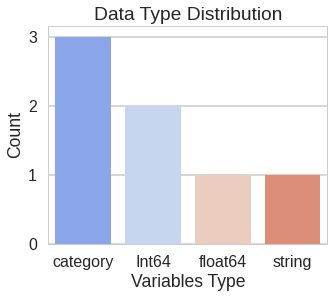

In [51]:
## statistics of present data
dataTypeDf = pd.DataFrame(dfc.dtypes.astype(str).value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(5,4)
sns.barplot(x=dataTypeDf.variableType.values,
           y=dataTypeDf["count"].values,ax=ax,palette=plt1)
ax.set(xlabel='Variables Type', ylabel='Count',title="Data Type Distribution")
fig.savefig("DataTypeDistribution.png",dpi = 300,bbox_inches='tight')

In [31]:
dfx = dfc[["City","Cuisine Style","Ranking","Rating","Price Range","Number of Reviews"]]
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   City               125527 non-null  category
 1   Cuisine Style      94176 non-null   category
 2   Ranking            115876 non-null  Int64   
 3   Rating             115897 non-null  float64 
 4   Price Range        77672 non-null   category
 5   Number of Reviews  108183 non-null  Int64   
dtypes: Int64(2), category(3), float64(1)
memory usage: 4.4 MB


## Missing Data Statistics

In [ ]:
num = dfc.isna().sum()

In [32]:
dic_missing = {}
num = dfc.isna().sum()
i = 0
for var in dfc:
    temp = str(var)
    dic_missing[temp] = num[i]
    i += 1
print(dic_missing)

{'Name': 0, 'City': 0, 'Cuisine Style': 31351, 'Ranking': 9651, 'Rating': 9630, 'Price Range': 47855, 'Number of Reviews': 17344}


In [33]:
dic_mp = {} # dictionary of missing proportion
num = dfc.isna().sum()
i = 0
for var in dfc:
    temp = str(var)
    dic_mp[temp] = num[i]/len(dfc)
    i += 1
df_mp = pd.DataFrame.from_dict(dic_mp, orient='index')

# for cols to apply function, I ref to data[u'线损率'] = data[u'线损率'].apply(lambda x: format(x, '.2%'))
df_mp = df_mp[0].apply(lambda x: format(x,'.2%'))

In [ ]:
df_mp

In [34]:
# install the missingno package
! pip3 install missingno

<AxesSubplot:>

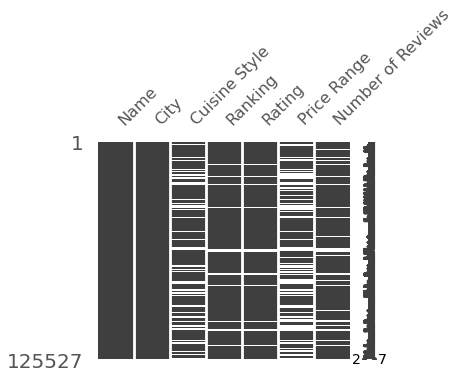

In [35]:
# see the missing value proportion visulisation
import missingno as msno
msno.matrix(dfc,figsize=(5,4))
# this one can be writen in our limitation section

In [ ]:
display(df_mp)

This means we need to drop at least 38% rows in our data, Let's contiune cleaning our data for better analysis!

Finally, you can mention this point in the limitation section.

## No.1 Method is to ignore Cuisine Study & Drop N/A Value 

In [36]:
# mydf.dropna(subset=['列名'],inplace=True)
# mydf=mydf.dropna(subset=['列名'])

print(dfc.shape)
# It is fine if there are null values in Cuisine Style.
dfx = dfc.dropna(subset = ['Ranking','Rating','Price Range','Number of Reviews'])
print(dfx.shape)

(125527, 7)
(74225, 7)


In [ ]:
dfc

# Processed Data Summary

In [ ]:
dfx.shape

In [ ]:
dfx.describe().to_csv('dfc_statistics.csv')

In [ ]:
dfx.describe()

In [ ]:
dfx

## Descriptive Statistics (Distribution)

Ref: [How your TripAdvisor ranking is calculated](https://blog.guestrevu.com/two-steps-to-improve-your-tripadvisor-ranking/)

- TripAdvisor Rating: This is the written review a guest will leave once they have stayed with you. Based on these reviews you will be given a rating, with 5 being the highest.

- TripAdvisor Ranking: Much like Google, TripAdvisor uses algorithms to rank and score a property based on a few different points.

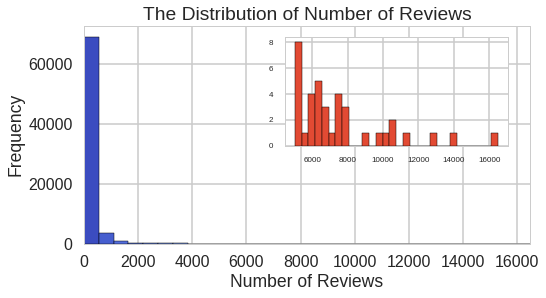

In [45]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,4))

hist, edges = np.histogram(dfx["Number of Reviews"],bins=30)
norm = plt.Normalize(edges.min(), edges.max()-3000)
colors = plt.cm.coolwarm(norm(edges).astype(float))
ax.bar(edges[:-1], hist,np.diff(edges), color=colors, ec="k", align="edge")
ax.set(xlabel="Number of Reviews",ylabel="Frequency",title="The Distribution of Number of Reviews",xlim=[0,16478])

ax1x = ax.inset_axes([0.45, 0.45, 0.5, 0.5]) #新建一个插画画布
#ax1x.set_ylabel("count",size=9)
ax1x.hist(dfx[dfx["Number of Reviews"]>5000]["Number of Reviews"],bins=30,ec="k")
ax1x.tick_params(axis=u'both',which=u'both',labelright=0,labelleft =1,labelbottom=1,bottom=1,top=0,right=0,labelsize=8)

fig.savefig("reviewsCnt.png",dpi = 300,bbox_inches='tight')

In [ ]:
import seaborn as sns
sns.pairplot(dfx)

### Number of Reviews Distribution

But you can see there are many values (bigger than 1250) cannot be seen clearly in this picture. We can plot a pair figure to see the outlier distribution.

Outliers can be a excellent restaurant.

By the way, the log distribution can be found in the following picture.

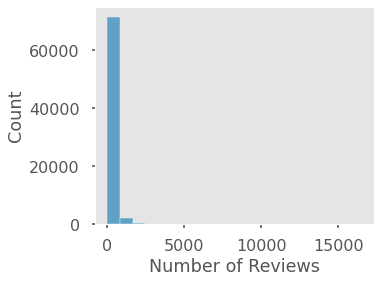

In [40]:
fig1,ax1 = plt.subplots(ncols=1,nrows=1,figsize=(5,4))
# ax1.axline(x=dfx['Number of Reviews'].mean())
sns.histplot(dfx, x="Number of Reviews",bins = 20, ax = ax1)
fig1.savefig("ReviewsDis.png",dpi=300,bbox_inches='tight')

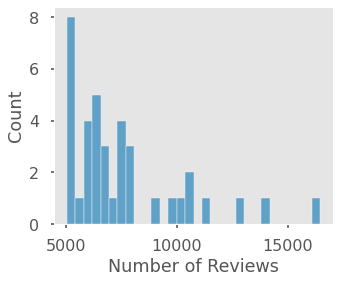

In [39]:
fig2,ax2 = plt.subplots(ncols=1,nrows=1,figsize=(5,4))
sns.histplot(dfx[dfx["Number of Reviews"]>5000]["Number of Reviews"],bins= 30, ax=ax2)
fig2.savefig("ReviewsOutliers.png",dpi=300,bbox_inches='tight')

Let's see what is in this outliers, using the below code

In [ ]:
dfx[dfx["Number of Reviews"]> 10000].to_csv("dfx_reviewsoutliers.csv")
dfx[dfx["Number of Reviews"]> 10000]

In [ ]:
dfx_temp = dfx[dfx["Number of Reviews"]>10000]
dfx_temp.iloc[-2] 

You can see this store have high number of review but low rating, interesting. You can see its Cuisine Style is few （['French', 'European]). In contrast, you can see Vegetarian Friendly can be a important element to receive great amount of review and nice rating in different European cities OR London.

Let's analysis the Ranking, Rating, Price Range distribution

### Ranking Distribution

What is your ranking dependen on
ref: https://www.tripadvisor.com/TripAdvisorInsights/w765

2980.305894240485


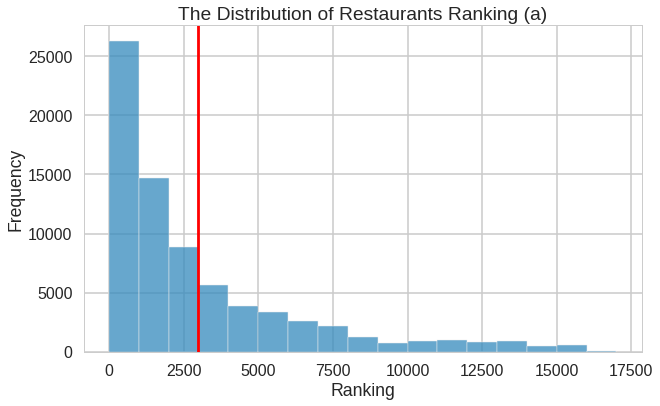

In [46]:
fig3,ax3 = plt.subplots(ncols=1,nrows=1,figsize=(10,6))

mean=dfx['Ranking'].mean()
median=dfx['Ranking'].median()
print(mean)
mode=dfx['Ranking'].mode()[0]

#ax3.axvline(mean, color='r', linestyle='--')
#ax3.axvline(median, color='g', linestyle='-')
#ax3.axvline(mode, color='b', linestyle='-')

ax3.axvline(mean, color='r', linestyle = '-')
sns.histplot(dfx, x="Ranking",binwidth = 1000, ax = ax3)
ax3.set(xlabel="Ranking",ylabel="Frequency",title="The Distribution of Restaurants Ranking (a)")


fig3.savefig("RankingDis.png",dpi=300,bbox_inches='tight')

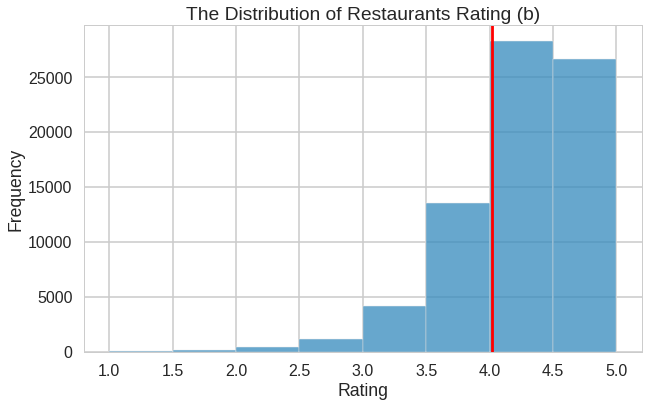

In [49]:
fig4,ax4 = plt.subplots(ncols=1,nrows=1,figsize=(10,6))

mean=dfx['Rating'].mean()
median=dfx['Rating'].median()
mode=dfx['Rating'].mode()[0]

'''
ax4.axvline(mean, color='r', linestyle='--')
ax4.axvline(median, color='g', linestyle='-')
ax4.axvline(mode, color='b', linestyle='-')
'''
ax4.axvline(mean, color='r', linestyle='-')

sns.histplot(dfx, x="Rating",binwidth = 0.5, ax = ax4)
ax4.set(xlabel = "Rating",ylabel = "Frequency", title = "The Distribution of Restaurants Rating (b)")

fig4.savefig("RatingDis.png",dpi=300,bbox_inches='tight')

In [ ]:
# fig5,ax5 = plt.subplots(ncols=1,nrows=1,figsize=(5,4))
sns.jointplot(x="Ranking", y="Number of Reviews", data=dfx, height=7)

# Correlation Analysis

In [ ]:
corrMatt = dfx[["Rating","Number of Reviews","Price Range","Ranking"]].corr() # 计算相关系数
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(7,6)
sns.heatmap(corrMatt, mask=mask,vmax=.5, vmin=-.5,square=True,annot=True)
ax.tick_params(axis=u'both',which=u'both',labelright=0,labelleft =1,labelbottom=1,top=0,right=0,left=0,bottom=0,labelsize=10)
fig.savefig("corr.png",dpi=300)

In [ ]:
# Compute the correlation matrix
corr = dfx.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5,center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In this correlation matrix:

- Rating is related to Ranking
- Ranking is related to Number of Reviews
- Rating !~ Number of Reviews
    
Rating, Number of Reviews can be two independences.
Ranking now become the dependence.

In [ ]:
dfx.info()

In [ ]:
# plot the regression overview stuff

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 12)
ax1.set(ylim=(0, 30000))

sns.regplot(x=dfx["Rating"].astype(float), y=dfx["Ranking"].astype(int),ax=ax1,x_jitter=.05)
sns.regplot(x=dfx["Number of Reviews"].astype(int), y=dfx["Ranking"].astype(int),logx = 1, ax = ax2)

In [ ]:
# sns.lmgplot(x="Number of Reviews", y="Ranking", hue="Price Range", data=dfx);

# Hypothesis

Are well ranked restaurants reviewed a lot or not ? (viz rank/number of reviews with lineplot)
Is there a correlation between rank/number of reviews ? Rate/Number of reviews ?

$\log Ranking = \beta_0 +  \beta_1 \times Rating + \beta_2 \times Reviews + \beta_3 \times Price  $ 

In [ ]:
dfx.columns

### Multiple Regression

Using the code from week 4

In [1]:
# import environment
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
df_reg = pd.read_csv("TA_restaurants_curated.csv")

df_reg = df_reg.drop(columns = ['Unnamed: 0','URL_TA','ID_TA','Reviews']) 
# overview of newly processed dataframe

df_reg.columns = ['Name','City','Cuisine_Style','Ranking','Rating','Price_Range','reviewsCnt']
df_reg.head(0)

,Name,City,Cuisine_Style,Ranking,Rating,Price_Range,reviewsCnt


In [3]:
categoryVariableList = ["City","Cuisine_Style","Price_Range"]
for var in categoryVariableList:
    df_reg[var] = df_reg[var].astype("object")
# display(df_reg.dtypes)

# Select cols
df_reg = df_reg[["City","Ranking","Rating","Price_Range","reviewsCnt"]]

# drop missing data
print(df_reg.shape)
# It is fine if there are null values in Cuisine Style.
df_reg = df_reg.dropna(subset = ['Ranking','Rating','Price_Range','reviewsCnt'])
print(df_reg.shape)

(125527, 5)
(74225, 5)


In [4]:
# we need convert $ to low; $$-$$$ to medium; $$$$ to high
dic_price = {"$":"low","$$ - $$$":"medium","$$$$":"high"}
df_reg['Price']=df_reg['Price_Range'].apply(lambda x : dic_price[x])
df_reg = df_reg[["Ranking","Rating","Price","reviewsCnt"]]

In [5]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74225 entries, 0 to 125445
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ranking     74225 non-null  float64
 1   Rating      74225 non-null  float64
 2   Price       74225 non-null  object 
 3   reviewsCnt  74225 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.8+ MB


There are 2 data types category (object) & numerical (int64, float64)

Before undertaking regression, several steps should be done, which include:

- Converting categorical variables into dummy variables
- Dealing with multicollinearity (and removing some variables if necessary)

### Encoding of categorical variables
First, we need to convert categorical variables into dummy variables (or indicator variable), using `One-Hot Encoding`.

In [9]:
df_numeric = pd.get_dummies(df_reg)

In [10]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74225 entries, 0 to 125445
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       74225 non-null  float64
 1   Rating        74225 non-null  float64
 2   reviewsCnt    74225 non-null  float64
 3   Price_high    74225 non-null  uint8  
 4   Price_low     74225 non-null  uint8  
 5   Price_medium  74225 non-null  uint8  
dtypes: float64(3), uint8(3)
memory usage: 2.5 MB


Remember that, a cateogircal variable of K categories or levels, usually enters a regression as a sequence of K-1 dummy variables. The level that is left out becomes the **reference level**, and this is important for interpreting the regression model.

Here we manually choose the reference level for each categorical variable and exclude them from the DataFrame. You can change the reference levels if you want.

In [11]:
# df_final = df_numeric.drop(['Price_low'], axis = 1)
df_final = df_numeric
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74225 entries, 0 to 125445
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       74225 non-null  float64
 1   Rating        74225 non-null  float64
 2   reviewsCnt    74225 non-null  float64
 3   Price_high    74225 non-null  uint8  
 4   Price_low     74225 non-null  uint8  
 5   Price_medium  74225 non-null  uint8  
dtypes: float64(3), uint8(3)
memory usage: 2.5 MB


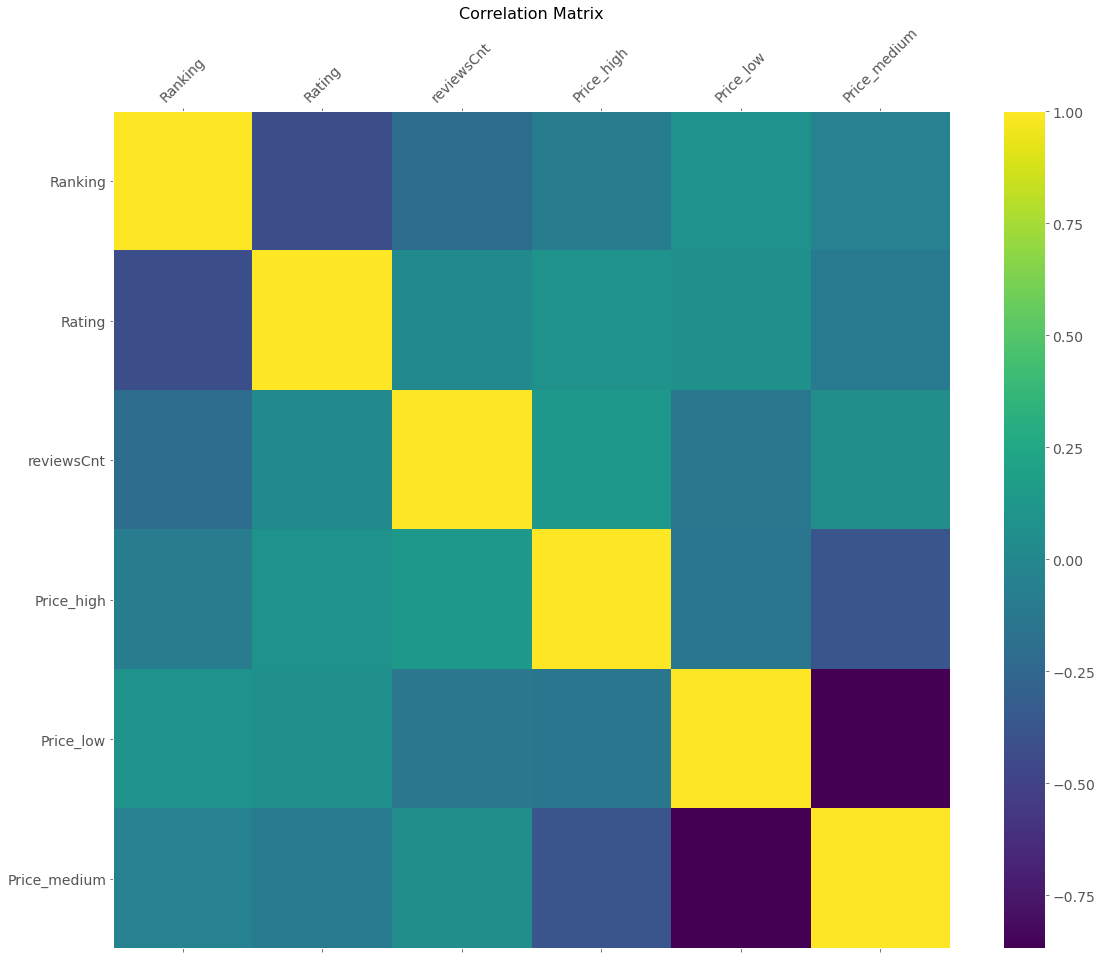

In [18]:
# method 1
df = df_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
f.savefig("corr_reg1.png",dpi = 300,bbox_inches='tight')

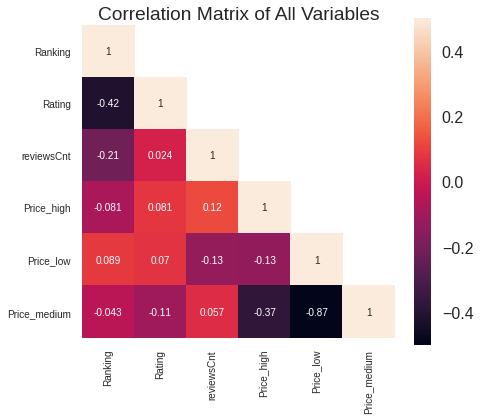

In [52]:
# method 2 
df = df_final
corrMatt = df_final.corr() # 计算相关系数
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(7,6)
ax.set(title = "Correlation Matrix of All Variables")
sns.heatmap(corrMatt, mask=mask,vmax=.5, vmin=-.5,square=True,annot=True)
ax.tick_params(axis=u'both',which=u'both',labelright=0,labelleft =1,labelbottom=1,top=0,right=0,left=0,bottom=0,labelsize=10)
fig.savefig("corr_reg2.png",dpi=300,bbox_inches='tight')

共线性： price_low & price_medium相关性太高！可能存在共线性，故去掉price_low

### Price Range

In [ ]:
df_numeric.head(0)

In [203]:
Price_Range = df_numeric.loc[:,['Ranking','Rating','reviewsCnt','Price_high', 'Price_medium', 'Price_low']]

In [212]:
model_all_Price = sm.formula.ols('Ranking ~ Rating + reviewsCnt + Price_high + Price_medium + Price_low', Price_Range).fit()
model_all_Price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ranking   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                 1.010e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:05:49   Log-Likelihood:            -6.9934e+05
No. Observations:               74225   AIC:                         1.399e+06
Df Residuals:                   74222   BIC:                         1.399e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.348e+04     81.160    166.127      0.000    1.33e+04    1.36e+04
Rating     -2530.5975     19.989   -126.597      0.000   -2569.777   -2491.418
reviewsCnt    -1.8658      0.030    -61.574      0.000      -1.925      -1.806
==============================================================================
Omnibus:                    17926.988   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37938.948
Skew:                           1.422   Prob(JB):                         0.00
Kurtosis:                       5.045   Cond. No.                     3.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using VIF to deal with multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [ ]:
df_new = drop_column_using_vif(df_numeric.drop('Ranking',axis = 1))

In [79]:
df_new.info()

NameError: name 'df_new' is not defined

 we can see only Price_high is dropped

## Build a linear regression model

### 1. Ranking ~ Rating, reviewsCnt & Price

In [ ]:
df_final.columns

In [100]:
# remove the price_low variable
model_Ranking1 = sm.OLS(endog = np.log(df_numeric[['Ranking']]),exog = df_numeric[['Rating','reviewsCnt','Price_high','Price_low']]).fit()
model_Ranking1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ranking   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          2.545e+05
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:12:20   Log-Likelihood:                     -1.5428e+05
No. Observations:               74225   AIC:                                  3.086e+05
Df Residuals:                   74221   BIC:                                  3.086e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating         1.7977      0.002    785.813      0.000       1.793       1.802
reviewsCnt    -0.0011   1.99e-05    -53.140      0.000      -0.001      -0.001
Price_high    -0.7558      0.032    -23.828      0.000      -0.818      -0.694
Price_low      0.3292      0.017     19.370      0.000       0.296       0.363
==============================================================================
Omnibus:                      512.149   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.820
Skew:                           0.077   Prob(JB):                    9.03e-159
Kurtosis:                       3.460   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Ranking ~ Rating & reviewsCnt

In [101]:
model_Ranking2 = sm.OLS(endog = np.log(df_numeric[['Ranking']]),exog = df_numeric[['Rating','reviewsCnt']]).fit()
model_Ranking2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ranking   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                          5.011e+05
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:12:25   Log-Likelihood:                     -1.5481e+05
No. Observations:               74225   AIC:                                  3.096e+05
Df Residuals:                   74223   BIC:                                  3.096e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating         1.8112      0.002    925.109      0.000       1.807       1.815
reviewsCnt    -0.0012   1.97e-05    -58.930      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      655.453   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1013.379
Skew:                           0.070   Prob(JB):                    8.86e-221
Kurtosis:                       3.555   Cond. No.                         110.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Ranking ~ Price

In [102]:
model_Ranking3 = sm.OLS(endog = np.log(df_numeric[['Ranking']]),exog = df_numeric[['Price_high','Price_low']]).fit()
model_Ranking3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ranking   R-squared (uncentered):                   0.289
Model:                            OLS   Adj. R-squared (uncentered):              0.289
Method:                 Least Squares   F-statistic:                          1.512e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:12:29   Log-Likelihood:                     -2.4138e+05
No. Observations:               74225   AIC:                                  4.828e+05
Df Residuals:                   74223   BIC:                                  4.828e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price_high     6.4181      0.098     65.520      0.000       6.226       6.610
Price_low      7.5830      0.047    161.068      0.000       7.491       7.675
==============================================================================
Omnibus:                    12855.932   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9203.090
Skew:                          -0.757   Prob(JB):                         0.00
Kurtosis:                       2.173   Cond. No.                         2.08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Ranking ~ Price & reviewsCnt

In [103]:
model_Ranking4 = sm.OLS(endog = np.log(df_numeric[['Ranking']]),exog = df_numeric[['reviewsCnt','Price_high','Price_low']]).fit()
model_Ranking4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ranking   R-squared (uncentered):                   0.367
Model:                            OLS   Adj. R-squared (uncentered):              0.367
Method:                 Least Squares   F-statistic:                          1.432e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:12:32   Log-Likelihood:                     -2.3712e+05
No. Observations:               74225   AIC:                                  4.742e+05
Df Residuals:                   74222   BIC:                                  4.743e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
reviewsCnt     0.0053   5.54e-05     95.058      0.000       0.005       0.005
Price_high     4.5036      0.095     47.578      0.000       4.318       4.689
Price_low      7.0914      0.045    158.462      0.000       7.004       7.179
==============================================================================
Omnibus:                    35710.077   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           697690.339
Skew:                          -1.855   Prob(JB):                         0.00
Kurtosis:                      17.554   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5. Ranking ~ Price & Rating

In [104]:
model_Ranking5 = sm.OLS(endog = np.log(df_numeric[['Ranking']]),exog = df_numeric[['Rating','Price_high','Price_low']]).fit()
model_Ranking5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ranking   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          3.259e+05
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:12:35   Log-Likelihood:                     -1.5566e+05
No. Observations:               74225   AIC:                                  3.113e+05
Df Residuals:                   74222   BIC:                                  3.114e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating         1.7484      0.002    820.539      0.000       1.744       1.753
Price_high    -0.9322      0.032    -29.005      0.000      -0.995      -0.869
Price_low      0.4323      0.017     25.123      0.000       0.399       0.466
==============================================================================
Omnibus:                      437.628   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.016
Skew:                          -0.059   Prob(JB):                    3.82e-135
Kurtosis:                       3.432   Cond. No.                         18.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6. Ranking ~ Rating

In [106]:
model_Ranking6 = sm.OLS(endog = np.log(df_numeric[['Ranking']]),exog = df_numeric[['Rating']]).fit()
model_Ranking6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ranking   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          9.541e+05
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:12:42   Log-Likelihood:                     -1.5651e+05
No. Observations:               74225   AIC:                                  3.130e+05
Df Residuals:                   74224   BIC:                                  3.130e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating         1.7609      0.002    976.777      0.000       1.757       1.764
==============================================================================
Omnibus:                      572.176   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              808.308
Skew:                          -0.094   Prob(JB):                    3.01e-176
Kurtosis:                       3.475   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. Ranking ~ reviewsCnt

In [107]:
model_Ranking7 = sm.OLS(endog = np.log(df_numeric[['Ranking']]),exog = df_numeric[['reviewsCnt']]).fit()
model_Ranking7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ranking   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.136
Method:                 Least Squares   F-statistic:                          1.168e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:12:44   Log-Likelihood:                     -2.4864e+05
No. Observations:               74225   AIC:                                  4.973e+05
Df Residuals:                   74224   BIC:                                  4.973e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
reviewsCnt     0.0068   6.28e-05    108.078      0.000       0.007       0.007
==============================================================================
Omnibus:                    84607.925   Durbin-Watson:                   0.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22434600.357
Skew:                          -5.588   Prob(JB):                         0.00
Kurtosis:                      87.434   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

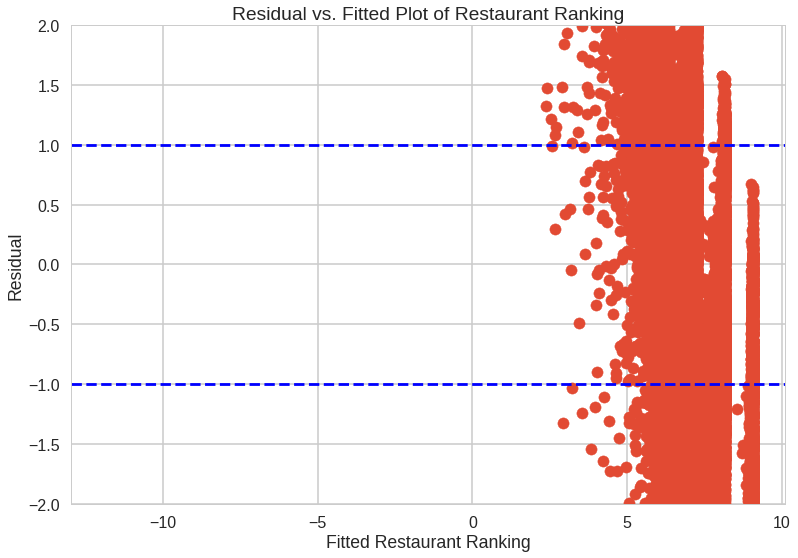

In [115]:
# plot 
model_Ranking_Residual = model_Ranking2
plt.scatter(model_Ranking_Residual.fittedvalues, model_Ranking_Residual.resid)
# adding title and labels
plt.xlabel('Fitted Restaurant Ranking')
plt.ylabel('Residual')
plt.axhline(y= -1,color="b",linestyle = "--")
plt.axhline(y = 1,color="b",linestyle = "--")
plt.title('Residual vs. Fitted Plot of Restaurant Ranking')
plt.ylim(-2,2)
plt.show()

## Logic Regression

In [ ]:
df_numeric.columns

/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


------------------------------------------
Print the model:
Rating : -1.3032277452948113
reviewsCnt : -0.004277604169782776
Price_high : 1.0160310064949718
Price_low : 1.495884284774907
Price_medium : 1.2045411945587656
------------------------------------------
Accuracy of the model is: 0.7133849781071068
The confusion matrix is:


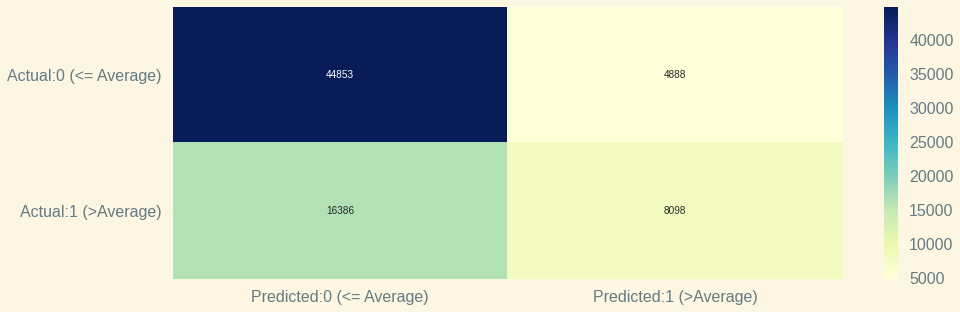

In [242]:
plt.style.use("seaborn-poster")
# If daily rental is larger than 4500, it is of Class 'True'. Otherwise, it is in Class 'False'.
threshold_bike_rental = df_numeric['Ranking'].mean()

# X = df_numeric[['Ranking', 'Rating', 'reviewsCnt', 'Price_high', 'Price_low','Price_medium']]
X = df_numeric[['Rating','reviewsCnt','Price_high','Price_low','Price_medium']]
y = df_numeric[['Ranking']] > threshold_bike_rental
###################

logreg = LogisticRegression()
logreg.fit(X, y)
y_pred=logreg.predict(X)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(y,y_pred)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0 (<= Average)','Predicted:1 (>Average)'],index=['Actual:0 (<= Average)','Actual:1 (>Average)'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

fig_logic, ax_logic = plt.subplots(figsize=(15,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", ax = ax_logic)
fig_logic.savefig("LogisticRegression.png")